# Ingeniería de Características (Feature Engineering) de Base de Datos de EMOTHAW

**Proyecto Integrador TC5035.10**

**Profesor Asesor:**
- Dra. Ludivina Facundo (ITESM)


**Profesores Investigadores/Tutores:**
- Dr. Juan Arturo Nolazco (ITESM)
- Dr. Marcos Faunez Zaunuy (TecnoCampus Barcelona)

**Equipo 11:**
- Francisco José Arellano Montes (A01794283)
- Armando Bringas Corpus (A01200230)
- Moisés Díaz Malagón (A01208580)

## Importación de librerías

In [1]:
# Bibliotecas para manejo de datos
import numpy as np
import pandas as pd

# Bibliotecas para preprocesamiento y transformación
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Bibliotecas para reducción de dimensionalidad
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Biblioteca para transformadas wavelet
import pywt

# Bibliotecas para visualización
import matplotlib.pyplot as plt
import seaborn as sns


Deshabilitar warnings para evitar mensajes innecesarios de las bibliotecas

**Nota:** Esto no afecta el procesamiento ni los datos, solo suprime mensajes de advertencia.



In [2]:
import warnings
warnings.filterwarnings("ignore")

## Carga de datos de la fase de EDA

Los datos utilizados en esta etapa fueron generados previamente durante la fase de Análisis Exploratorio de Datos (EDA). 

**Nota:** En el EDA, los datos ya fueron aleatorizados utilizando la función `train_test_split`, lo cual garantiza que no exista sesgo en la distribución de los datos para las etapas de entrenamiento y prueba.

In [3]:
def cargar_datos():
    """
    Carga los datos preprocesados del análisis exploratorio
    """
    X_train = pd.read_parquet('../data/raw_binary/X_train.parquet')
    y_train = pd.read_parquet('../data/raw_binary/y_train.parquet')
    X_val = pd.read_parquet('../data/raw_binary/X_val.parquet')
    y_val = pd.read_parquet('../data/raw_binary/y_val.parquet')
    X_test = pd.read_parquet('../data/raw_binary/X_test.parquet')
    y_test = pd.read_parquet('../data/raw_binary/y_test.parquet')
    return X_train, y_train, X_val, y_val, X_test, y_test

In [4]:
X_train, y_train, X_val, y_val, X_test, y_test = cargar_datos()


## Normalización

En esta sección, realizamos la normalización de los datos para asegurar que todas las características tengan la misma escala y evitar que algunas dominen sobre otras debido a sus magnitudes. La normalización es una técnica fundamental en el preprocesamiento de datos, especialmente en modelos de aprendizaje automático que utilizan medidas de distancia o están basados en gradientes. Con lo cual buscamos: 

- **Evitar sesgos en el modelo:** Algunas variables pueden tener valores más grandes que otras, afectando el desempeño del modelo.
- **Mejorar la convergencia de algoritmos basados en gradientes:** Técnicas como redes neuronales o regresión logística se benefician de datos normalizados para una optimización más rápida.
- **Facilitar la comparación de características:** Permite comparar directamente diferentes características sin importar sus escalas originales.


Utilizamos la normalización estándar (Z-score normalization), que transforma los valores restando la media y dividiéndolos por la desviación estándar:

$$
\[
x' = \frac{x - \bar{x}}{\sigma}
\]
$$

Donde:
- $\(x'\)$ es el valor normalizado,
- $\(\bar{x}\)$ es la media de la característica,
- $\(\sigma\)$ es la desviación estándar.

Esta técnica asegura que los datos tengan una distribución con media 0 y varianza 1, lo que es ideal para muchos algoritmos de aprendizaje automático.


In [5]:
x_mean = X_train['x'].explode().mean()
x_std = X_train['x'].explode().std()
y_mean = X_train['y'].explode().mean()
y_std = X_train['y'].explode().std()

In [6]:
X_train.head(1)

,homework,pen_status,x,y,azimuth,altitude,pressure
Subject,,,,,,,
126,4,1,"[38473, 38481, 38490, 38499, 38514, 38531, 385...","[15452, 15453, 15454, 15458, 15463, 15469, 154...","[3440, 3440, 3440, 3430, 3430, 3430, 3430, 343...","[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[16, 24, 25, 29, 29, 31, 35, 42, 55, 70, 80, 9..."


In [7]:
X_train.shape

(476, 7)

In [8]:
X_train['x'] 

Subject
126    [38473, 38481, 38490, 38499, 38514, 38531, 385...
107    [50341, 50332, 50325, 50315, 50299, 50278, 502...
17     [33898, 33879, 33875, 33872, 33869, 33864, 338...
25     [26453, 26316, 26271, 26271, 25938, 25921, 258...
100    [38378, 38418, 38435, 38453, 38468, 38481, 384...
                             ...                        
49     [38763, 38782, 38794, 38803, 38811, 38815, 388...
3      [35328, 35349, 35361, 35370, 35375, 35379, 353...
3      [34708, 34670, 34666, 34666, 34666, 34666, 346...
54     [47850, 47844, 47840, 47836, 47832, 47827, 478...
40     [29762, 29762, 29759, 29737, 29700, 29645, 295...
Name: x, Length: 476, dtype: object

In [9]:
X_train['x'].iloc[0]

array([38473, 38481, 38490, ..., 33315, 33324, 33334], shape=(1953,))

In [10]:
normalized_x = (X_train['x'] - x_mean) / x_std
normalized_y = (X_train['y'] - y_mean) / y_std

In [11]:
normalized_train_df = pd.concat([X_train[['homework','pen_status']], normalized_x, normalized_y], axis=1)

In [12]:
normalized_train_df.head()

,homework,pen_status,x,y
Subject,,,,
126,4,1,"[0.4658252256020692, 0.4664245172768823, 0.467...","[-0.419896948011008, -0.4197981474091503, -0.4..."
107,1,1,"[1.3548744251872404, 1.3542002220530756, 1.353...","[1.4572156866842116, 1.4572156866842116, 1.457..."
17,4,1,"[0.12310529906835183, 0.1216819813406708, 0.12...","[-0.3204047419402629, -0.3213927479588403, -0...."
25,6,0,"[-0.43461051580455, -0.44487338573572366, -0.4...","[-0.6641320358033436, -0.6390366829314773, -0...."
100,3,1,"[0.45870863696366415, 0.4617050953377294, 0.46...","[1.7489738639701204, 1.7489738639701204, 1.748..."


## Data Augmentation

El Data Augmentation (aumento de datos) es una técnica utilizada en aprendizaje automático para incrementar la cantidad de datos disponibles sin necesidad de recopilar nuevos ejemplos. Esto es particularmente útil cuando se cuenta con conjuntos de datos limitados y se desea mejorar la capacidad generalizadora del modelo, con el cual buscamos:

- **Mejora la robustez del modelo:** Permite que el modelo aprenda de datos ligeramente modificados, reduciendo el sobreajuste.
- **Aumenta la diversidad de los datos:** Introduce variaciones en los datos sin modificar la distribución original.
- **Mejora la capacidad del modelo para manejar ruido:** Simula condiciones más realistas en los datos de entrada.



En esta implementación, se aplica **ruido gaussiano** a las características `x` y `y`. Se genera un 20% adicional de ejemplos seleccionando aleatoriamente filas del conjunto de datos y agregando un pequeño ruido normal (con media 0 y desviación estándar pequeña) a cada muestra. 

$$
\[
x' = x + \mathcal{N}(0, \sigma^2)
\]
\[
y' = y + \mathcal{N}(0, \sigma^2)
\]
$$

Donde:
- $\( x', y' \)$ son los nuevos valores con ruido agregado.
- $\( \mathcal{N}(0, \sigma^2) \)$ representa una distribución normal con media 0 y varianza $\( \sigma^2 \)$.
- $\( \sigma \)$ es un valor pequeño que controla la intensidad del ruido.

Para la implementación:
- Se define un **factor de escala** (`SCALE`) que determina la magnitud del ruido.
- Se elige un **porcentaje de datos a aumentar** (`PROPORTION = 0.2`).
- Se seleccionan filas al azar del dataset original.
- Se generan nuevas versiones de `x` y `y` con el ruido agregado.
- Se crean nuevas filas que mantienen el resto de la estructura de los datos originales.

Esta técnica permite mejorar la generalización del modelo al exponerlo a ejemplos ligeramente modificados sin cambiar la distribución de los datos de manera significativa.


### Ejemplo de Implementación de Data Augmentation

In [13]:
normalized_train_df.iloc[1][['x','y']].values[0].shape
normalized_train_df.iloc[1][['x','y']].values[1].shape

(755,)

In [14]:
original_x_y_arrays = normalized_train_df.iloc[1][['x','y']].values
random_noise_x = np.random.normal(0, 0.01, size=original_x_y_arrays[0].shape)
random_noise_y = np.random.normal(0, 0.01, size=original_x_y_arrays[1].shape)
new_x_data = original_x_y_arrays[0] + random_noise_x  # Add noise
new_y_data = original_x_y_arrays[1] + random_noise_y  # Add noise


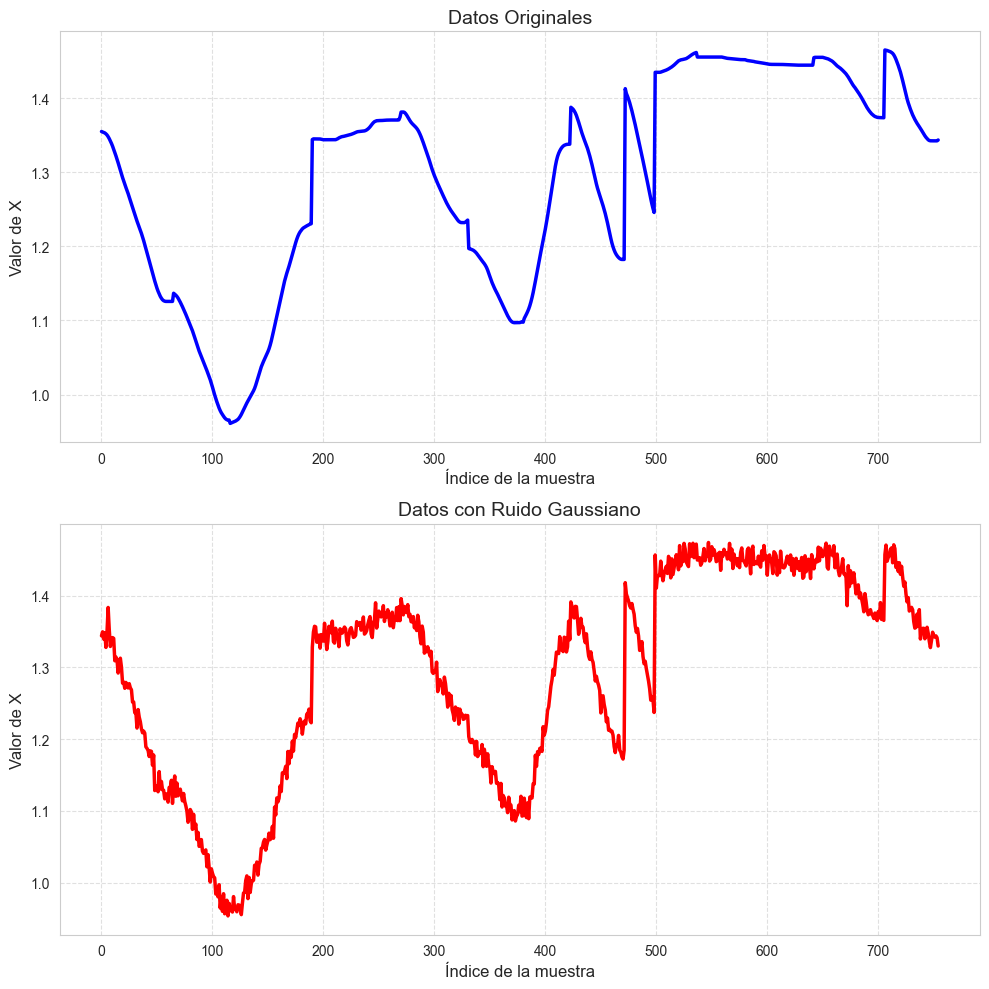

In [15]:
# Crear una figura con dos subgráficos para visualizar por separado
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Gráfica para los datos originales
sns.lineplot(x=range(len(original_x_y_arrays[0])), y=original_x_y_arrays[0],
             linewidth=2.5, ax=axes[0], color="blue")
axes[0].set_title("Datos Originales", fontsize=14)
axes[0].set_xlabel("Índice de la muestra", fontsize=12)
axes[0].set_ylabel("Valor de X", fontsize=12)
axes[0].grid(True, linestyle='--', alpha=0.6)

# Gráfica para los datos con ruido gaussiano
sns.lineplot(x=range(len(new_x_data)), y=new_x_data,
             linewidth=2.5, ax=axes[1], color="red")
axes[1].set_title("Datos con Ruido Gaussiano", fontsize=14)
axes[1].set_xlabel("Índice de la muestra", fontsize=12)
axes[1].set_ylabel("Valor de X", fontsize=12)
axes[1].grid(True, linestyle='--', alpha=0.6)

# Ajustar el layout
plt.tight_layout()
plt.show()


La primera gráfica muestra los datos originales de la variable `X`, mientras que la segunda incluye ruido gaussiano para aumentar la diversidad del conjunto. Este ruido introduce pequeñas variaciones, manteniendo la forma general de la señal, lo que ayuda a mejorar la robustez del modelo y evita el sobreajuste.


### Implementación de Data Augmentation a todo el conjunto 

In [16]:
SCALE = 0.01
PROPORTION = 0.2
np.random.seed(42)

def augment_data(df):
    qty_rows_to_augment = int(PROPORTION * df.shape[0])
    df_augmented = df.copy()

    for _ in range(qty_rows_to_augment):  # Create new N data
        target_row = np.random.randint(0, df.shape[0] - 1)  # Randomly select a row
        original_x_y_arrays = df.iloc[target_row][['x','y']].values

        # Generate Gaussian noise with the same shape as the selected row
        random_noise_x = np.random.normal(0, SCALE, size=original_x_y_arrays[0].shape)
        random_noise_y = np.random.normal(0, SCALE, size=original_x_y_arrays[1].shape)
        new_x_data = original_x_y_arrays[0].shape + random_noise_x  # Add noise
        new_y_data = original_x_y_arrays[1].shape + random_noise_y  # Add noise

        # Convert to DataFrame and maintain original structure
        augmented_row = {
            'x': new_x_data,
            'y': new_y_data,
            'homework': df.iloc[target_row]['homework'],
            'pen_status': df.iloc[target_row]['pen_status'],
        }
        augmented_row = pd.DataFrame([augmented_row])

        # Concatenate the augmented row to the original dataset
        df_augmented = pd.concat([df_augmented, augmented_row], ignore_index=True, axis=0)

    return df_augmented

In [17]:
df_augmented = augment_data(normalized_train_df)

In [18]:
normalized_train_df.shape, df_augmented.shape

((476, 4), (571, 4))

Se realizó un **aumento de datos** aplicando un ruido gaussiano a las señales `x` y `y`. Se generan nuevas filas equivalentes al **20% del total de los datos originales** (especificado por `PROPORTION = 0.2`), lo que incrementa el conjunto de datos de 476 filas originales a un total de 571 filas.

**Consideraciones Importantes**:
- **SCALE = 0.01**: Define la magnitud del ruido gaussiano añadido.
- **np.random.seed(42)**: Asegura reproducibilidad en la selección de filas y generación de ruido.
- Para cada nueva fila:
  - Se selecciona aleatoriamente una fila del conjunto original.
  - Se genera ruido gaussiano con una distribución normal (media 0 y desviación estándar `SCALE`).
  - El ruido se agrega a las señales `x` y `y` para crear una nueva fila con la misma estructura que las originales.
  
Esta técnica incrementa la diversidad del conjunto de datos sin alterar su distribución, mejorando la capacidad del modelo para generalizar.

## Ingeniería de Características - Selección y Extracción

### Extracción de Características Wavelet

Implementamos la transformación wavelet para capturar características tanto en frecuencia como temporales.La transformada wavelet es una técnica poderosa para el análisis de señales, ya que permite descomponer una señal en sus componentes de frecuencia en diferentes escalas de tiempo. Esto resulta útil para extraer características representativas tanto en el dominio temporal como en el dominio de frecuencia, con lo cual buscamos:

- **Análisis multirresolución:** Proporciona información detallada sobre las características locales (temporal) y globales (frecuencia) de una señal.
- **Reducción de ruido:** Facilita la separación de componentes útiles de ruido.
- **Características compactas:** Permite extraer un conjunto reducido pero informativo de características para modelos de aprendizaje automático.

Para la implementación se siguen los siguientes pasos:
1. Se utiliza la **Transformada Wavelet Discreta (DWT)**, que descompone la señal en:
   - **Coeficientes de aproximación:** Representan las componentes de baja frecuencia.
   - **Coeficientes de detalle:** Capturan las componentes de alta frecuencia.
2. Para cada nivel de descomposición, se calculan las siguientes métricas estadísticas:
   - Media
   - Desviación estándar
   - Mínimo
   - Máximo
3. Estas métricas se convierten en las **características extraídas** que alimentan al modelo.

La transformada wavelet es una técnica poderosa para extraer información relevante de las señales, ya que:
- Captura tanto **tendencias globales** como **detalles finos** en las señales.
- Proporciona información compacta que es relevante para modelos supervisados y no supervisados.

La transformada wavelet, al ser aplicada sobre las señales `x` y `y`, genera un total de 44 características por señal, las cuales incluyen información clave que no es evidente en el dominio temporal original.


In [19]:
class WaveletTransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer for wavelet transformation of time-series data.
    '''

    def _extract_wavelet_features(self, data_list, wavelet='db4', level=10):
        """
        Aplicar la Transformada Wavelet a una lista de datos y extraer características.

        Parámetros:
        data_list = lista de datos a usar.
        wavelet = transformacion wavelet a usar (Daubechies 4 wavelet)
        level = número de veces que se realiza el proceso de descomposición en una señal o imagen
        """
        coeffs = pywt.wavedec(data_list, wavelet, level=level)
        features = []
        for coef in coeffs:
            features.extend([
                np.mean(coef),
                np.std(coef),
                np.min(coef),
                np.max(coef)
            ])
        return features

    def fit(self, X, y=None):
        # stateless transformer
        self.column_names = list(X.columns)

        return self

    def transform(self, X, y=None):
        return X.apply(self._batch_process)

    def _apply_transformation(self, window, column_name):
        return self._extract_wavelet_features(window)

    def _batch_process(self, column):
        return column.map(lambda col_val: np.array(self._apply_transformation(col_val, column.name)))

    def get_feature_names_out(self, column_names):
        return self.column_names

In [20]:
wavelet_transformer = WaveletTransformer()

numerical_columns = ['x', 'y']

col_transformer = ColumnTransformer([
    ('wavelet', wavelet_transformer, numerical_columns)
], remainder='passthrough')
col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('wavelet', WaveletTransformer(), ['x', 'y'])])

In [21]:
wavelet_train_df = col_transformer.fit_transform(df_augmented)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
wavelet_train_df = pd.DataFrame(wavelet_train_df, columns=column_names) # transformer generates matrix, convert back to dataframe

In [22]:
wavelet_train_df

,x,y,homework,pen_status
0,"[12.148005488777905, 4.611343995005918, 1.8580...","[-13.580025434111302, 1.370950774193394, -16.9...",4,1
1,"[43.10940807817893, 1.0221309208777931, 41.047...","[42.39905209640803, 8.715453443123613, 21.8172...",1,1
2,"[3.050218115248705, 1.6621247238320849, -0.878...","[-10.080347079861946, 0.5732943476219098, -10....",4,1
3,"[-15.887530530241712, 2.3744107757497095, -21....","[-21.698861454684895, 1.576843366787542, -24.7...",6,0
4,"[5.7166253176828485, 17.31012802124303, -33.80...","[51.69157672039583, 6.411944447410344, 38.8289...",3,1
...,...,...,...,...
566,"[54656.11005251284, 0.047783318888902596, 5465...","[54656.049069048546, 0.036422233955932054, 546...",6,0
567,"[25600.1061890809, 0.0783055755567984, 25599.9...","[25599.841231014194, 0.12528839003204634, 2559...",3,0
568,"[47519.830010511396, 0.05926905641596754, 4751...","[47520.020861697754, 0.06343797238265692, 4751...",7,0
569,"[50144.01728368786, 0.0908948139487935, 50143....","[50144.08614492719, 0.08725972279251756, 50143...",3,1


Usando la transformada wavelet, las señales x y y se descomponen en 44 características representativas que capturan información estadística (media, desviación estándar, mínimos y máximos) a través de coeficientes wavelet. La wavelet captura patrones en las señales que pueden no ser evidentes en el dominio temporal original.

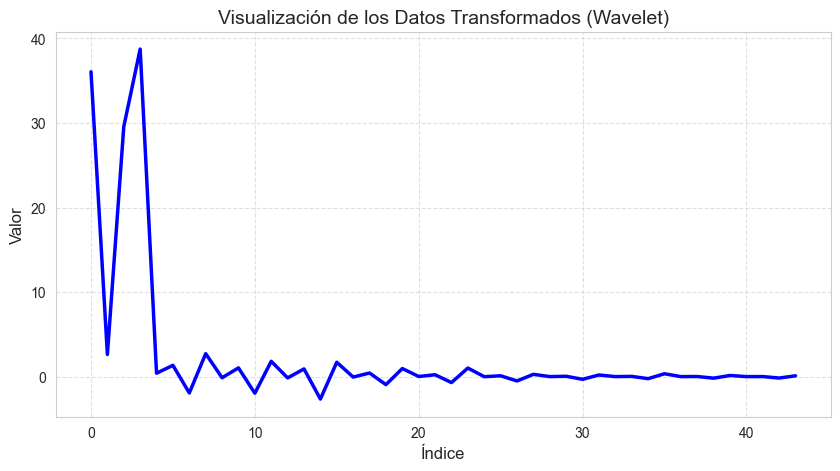

In [23]:

plt.figure(figsize=(10, 5))

sns.lineplot(
    x=range(len(wavelet_train_df.iloc[10]['x'])), 
    y=wavelet_train_df.iloc[10]['x'], 
    linewidth=2.5, 
    color="blue"
)

plt.xlabel("Índice", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.title("Visualización de los Datos Transformados (Wavelet)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()


La gráfica muestra los valores de la señal transformada mediante la **Transformada Wavelet Discreta (DWT)** para un caso específico (`wavelet_train_df.iloc[10]['x']`). Este proceso captura características representativas tanto en el dominio de tiempo como en el dominio de frecuencia.

- **Región inicial:** Se observan valores elevados, que representan las contribuciones más significativas de la señal en los primeros índices.
- **Región estable:** A medida que avanzamos en los índices, los valores tienden a estabilizarse en torno a cero, indicando menor contribución de las frecuencias más altas.

Esta representación permite identificar las características principales de la señal descompuesta y sugiere que las frecuencias más bajas concentran la mayor parte de la energía de la señal, lo que es crucial para el modelado posterior.


Previo a reducir la dimensionalidad, es necesario expandir los array de datos tanto X como Y.

In [24]:
# flatten data
x_train_data = pd.DataFrame(wavelet_train_df['x'].to_list())
y_train_data = pd.DataFrame(wavelet_train_df['y'].to_list())

### LLE (Locally Linear Embedding)

Locally Linear Embedding (LLE) es un algoritmo de reducción de dimensionalidad no lineal que busca preservar la estructura local de los datos. Se basa en la hipótesis de que los datos de alta dimensión están distribuidos en un manifold (una superficie de menor dimensión) y que las relaciones locales entre los puntos se pueden capturar y mantener en un espacio de menor dimensionalidad.

A diferencia de métodos como PCA (Análisis de Componentes Principales), que utiliza una proyección lineal para reducir la dimensionalidad, LLE utiliza las relaciones locales de cada punto con sus vecinos más cercanos. Esto le permite capturar estructuras no lineales presentes en los datos y obtener una representación más precisa de su geometría intrínseca.

Al momento de aplicar LLE para reducir la dimensionalidad, es necesario identificar los valores óptimos de los parámetros clave en el siguiente orden:

1. **`n_neighbors`**: número de vecinos a considerar para la reconstrucción de cada punto, define la estructura local que LLE utilizará para mapear los datos. Si los vecinos no están correctamente seleccionados, el mapeo será incorrecto, sin importar el número de componentes (`n_components`) utilizados. Muy pocos vecinos no pueden captar suficiente información local, mientras que demasiados vecinos pueden incluir relaciones no relevantes.


2. **`n_components`**: número de componentes a extraer. Una vez definido el parámetro `n_neighbors`, que asegura una representación adecuada de la estructura local, es posible enfocarse en cuántas dimensiones retener. Este parámetro está relacionado con la dimensionalidad intrínseca de los datos por lo que, más componentes retienen más información pero también pero pueden introducir redundancia o ruido.

#### Selección de **`n_neighbors`**

In [25]:
def plot_reconstruction_error_neighbors(x_train_data, n_components=35, max_neighbors=20):
    """
    Visualiza el error de reconstrucción en función del número de vecinos
    utilizando Locally Linear Embedding (LLE).
    """
    errors = []
    neighbors_range = range(2, max_neighbors + 1)

    for neighbors in neighbors_range:
        embedding = LocallyLinearEmbedding(n_components=n_components, n_neighbors=neighbors, eigen_solver='dense')
        embedding.fit(x_train_data)
        errors.append(embedding.reconstruction_error_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=list(neighbors_range), y=errors, marker='o', linewidth=2.5, color='blue')
    
    plt.xlabel('Número de Vecinos', fontsize=12)
    plt.ylabel('Error de Reconstrucción', fontsize=12)
    plt.title('Selección de n_neighbors usando Error de Reconstrucción', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()


La función `plot_reconstruction_error_neighbors` permite visualizar el error de reconstrucción en función del número de vecinos para distintos valores de n_neighbors con un número fijo de componentes. En este caso, de acuerdo a la gráfica se puede seleccionar un rango entre 5 a 10 vecinos para minimizar el error de reconstrucción.

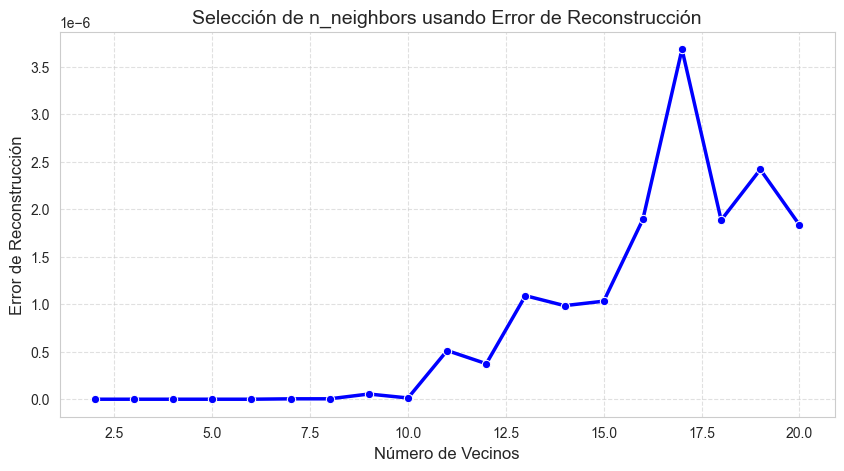

In [26]:
plot_reconstruction_error_neighbors(x_train_data, n_components=6, max_neighbors=20)

#### Selección de **`n_components`**

In [27]:
def plot_lle_reconstruction_errors(x_train_data, max_components=35, n_neighbors=4):
    """
    Visualiza el error de reconstrucción en función del número de componentes
    utilizando Locally Linear Embedding (LLE).
    """
    errors = []
    components_range = range(1, max_components + 1)

    for n in components_range:
        embedding = LocallyLinearEmbedding(n_components=n, n_neighbors=n_neighbors, eigen_solver='dense')
        embedding.fit(x_train_data)
        errors.append(embedding.reconstruction_error_)

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=list(components_range), y=errors, marker='o', linewidth=2.5, color='green')

    plt.xlabel('Número de Componentes', fontsize=12)
    plt.ylabel('Error de Reconstrucción', fontsize=12)
    plt.title('Selección de n_components usando Error de Reconstrucción', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)

    plt.show()


La función plot_lle_reconstruction_errors permite visualizar el error de reconstrucción en función del número de componentes seleccionados, el gráfico generado nos permite identificar el "punto de codo" (elbow point) donde agregar más componentes no reduce significativamente el error. En este caso podemos seleccionar entre 20 a 25 componentes.

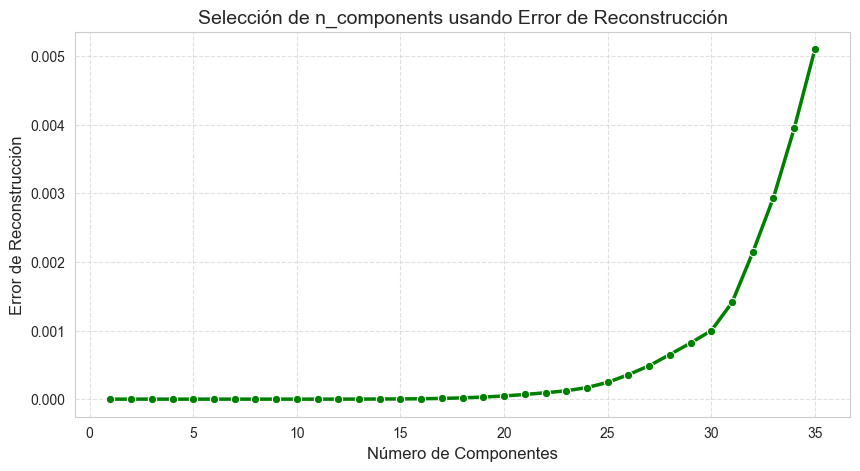

In [28]:
plot_lle_reconstruction_errors(x_train_data, max_components=35, n_neighbors=5)


In [29]:
embedding = LocallyLinearEmbedding(n_components=20, n_neighbors=5)
lle_train_data = embedding.fit_transform(x_train_data)
lle_train_data.shape

(571, 20)

In [30]:
def visualize_multiple_components(X_reduced, num_components=20):
    """
    Visualiza pares de componentes reducidos en gráficos dispersos.
    """
    num_plots = min(num_components, X_reduced.shape[1]) // 2
    rows = (num_plots + 1) // 2  # Dividir las gráficas en dos renglones
    fig, axes = plt.subplots(rows, 2, figsize=(18, 12))
    axes = axes.flatten()

    for i in range(num_plots):
        scatter = sns.scatterplot(
            x=X_reduced[:, 2 * i], 
            y=X_reduced[:, 2 * i + 1], 
            hue=X_reduced[:, 2 * i], 
            palette='Spectral', 
            ax=axes[i],
            legend=False
        )
        axes[i].set_title(f"Componentes {2 * i + 1} vs {2 * i + 2}", fontsize=12)
        axes[i].set_xlabel(f"Componente {2 * i + 1}", fontsize=10)
        axes[i].set_ylabel(f"Componente {2 * i + 2}", fontsize=10)
    
    for j in range(num_plots, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


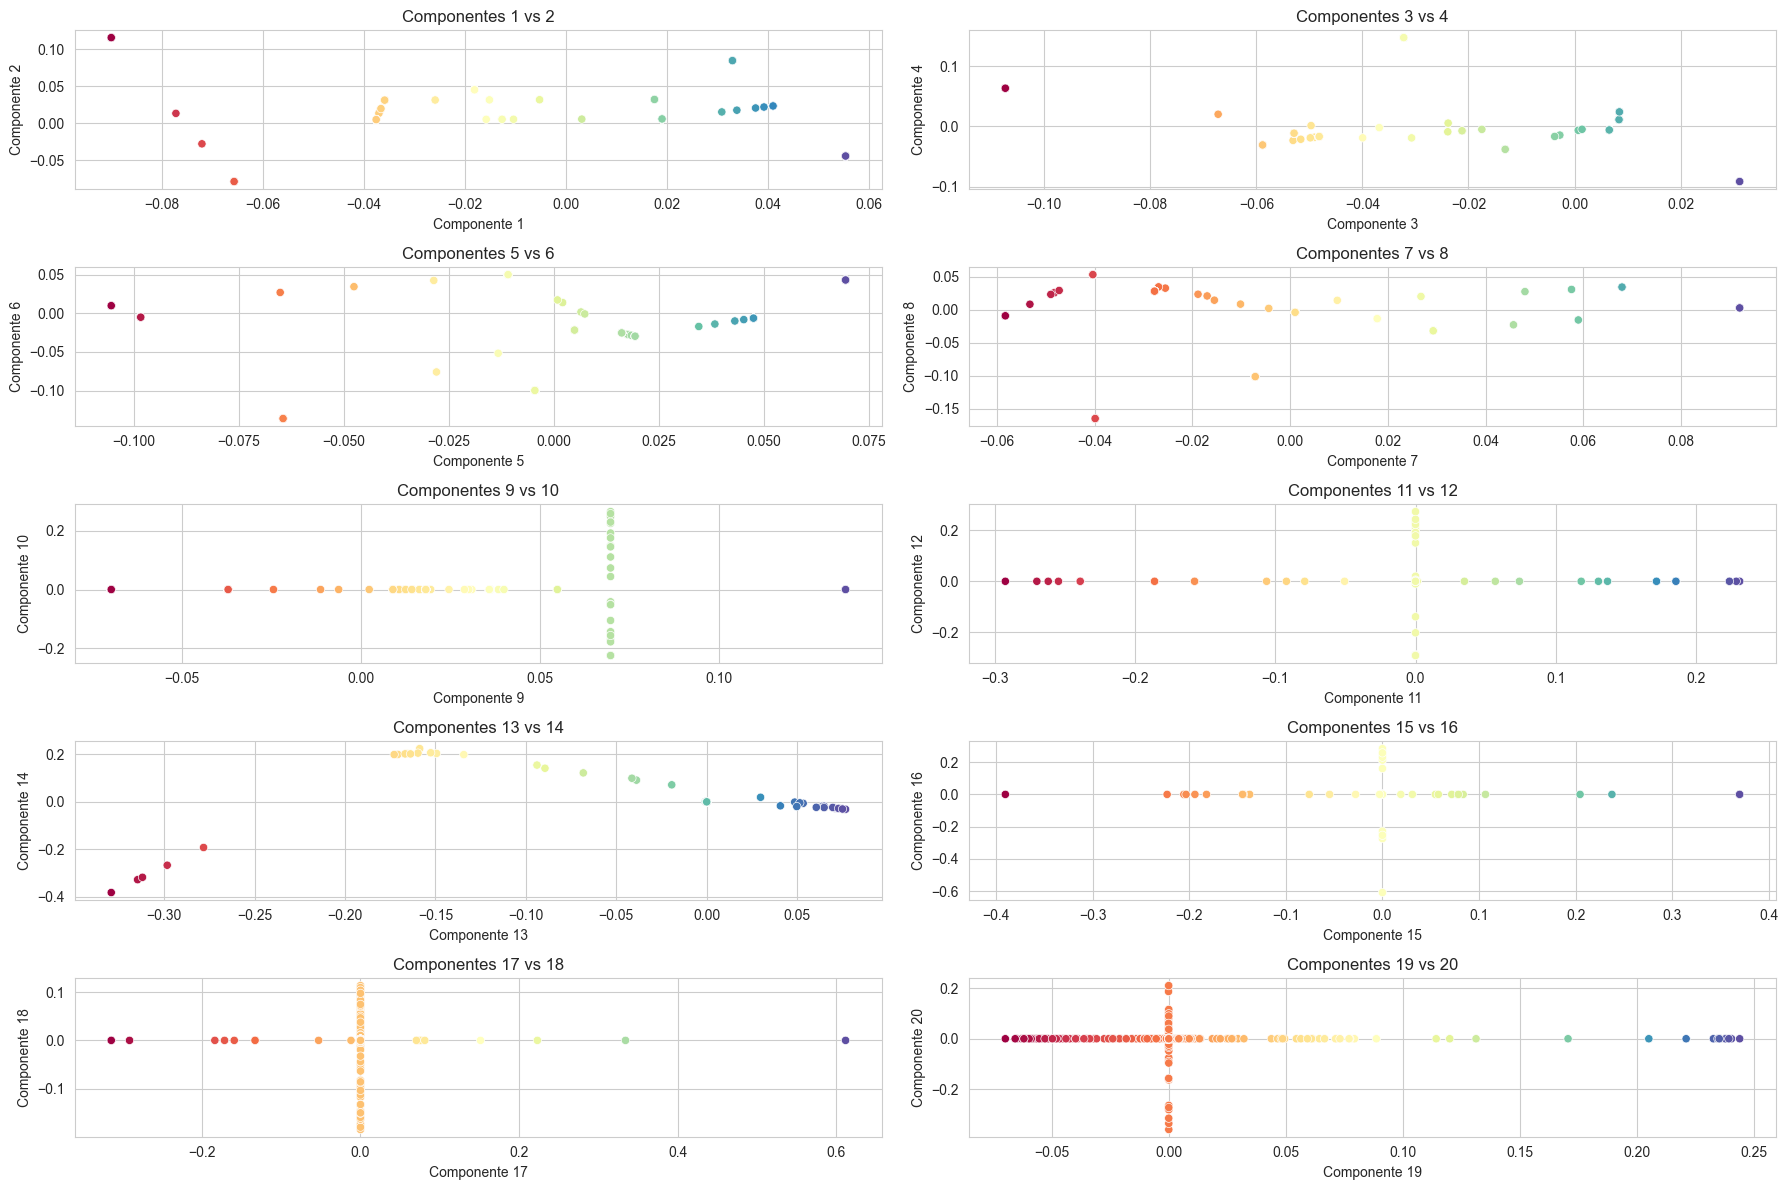

In [31]:
visualize_multiple_components(lle_train_data, num_components=20)

La gráfica representa los datos reducidos utilizando Locally Linear Embedding (LLE). En este caso, las 20 componentes seleccionadas (resultado del análisis de codo) se muestran en pares consecutivos para facilitar su análisis. Cada subgráfico muestra un par de componentes, los pares de componentes se visualizan en ejes X y Y, permitiendo identificar cómo los datos se distribuyen en el espacio reducido.
En cada subgráfico, puedes observar cómo los puntos se agrupan o separan. Al observar que se presentan agrupaciones claras o regiones de densidad, esto quiere decir que las relaciones locales fueron bien preservadas por el LLE.

### PCA (Principal Component Analysis)

El **PCA (Principal Component Analysis)** es un método de reducción de dimensionalidad que transforma los datos originales en un conjunto de componentes principales ortogonales, ordenados según la cantidad de varianza que explican en los datos. De igual manera, similar al LLE, se necesita identificar los valores óptimos de los parámetros:

1.   **Porcentaje de varianza:**

La varianza porcentual es una medida de qué parte de la varianza total en el conjunto de datos es capturada por cada componente principal. Proporciona información sobre cuánta información (o variabilidad) se retiene cuando proyecta sus datos en menos dimensiones.

2.   **Varianza cumulativa**:
La varianza acumulada es el total acumulado de la varianza explicada por los componentes principales en PCA. Indica qué parte de la varianza total se captura al combinar los primeros n componentes principales.


In [32]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train_data)

PCA es sensible a la variación de cada característica, lo que significa que las características con rangos más grandes dominarán los componentes principales. Para evitar esto, es importante estandarizar los datos antes de aplicar PCA. La estandarización transforma los datos para que todas las características contribuyan por igual al PCA.


$\text{cov}_{x, y} = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{N - 1}$

- $\text{cov}_{x, y}$: covariance of features $x$ and $y$
- $x_i$: specific training example from feature $x$
- $y_i$: specific training example from feature $y$
- $\bar{x}$: mean over all examples of feature $x$
- $\bar{y}$: mean over all examples of feature $y$
- $N$: total amount of examples


In [33]:
# Entrenamos nuestros datos actuales usando el metodo PCA
variance_percentage = 0.90
pca = PCA()
pca.fit(X_scaled)

# Obtenemos la varianza cumulativa
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)
print("Varianza cumulativa:", len(cumulative_variance))

# Obtencion de n_componentes o el numer de componentes
n_components = np.argmax(cumulative_variance >= variance_percentage) + 1
print(f"Componentes necesarios para retener: {variance_percentage*100}%, varianza: {n_components}")

Varianza cumulativa: 44
Componentes necesarios para retener: 90.0%, varianza: 16


En estas siguientes líneas de código, se sigue el siguiente proceso:

Entrenamos los datos actuales, ahora obtenemos el radio de varianza, usando el método explained_variance_ratio_, una vez obtenido el radio de varianza podemos sumar los valores y obtener la varianza cumulativa. De aquí podemos el número de componentes obteniendo el numero de valores que no se pasen del porcentaje de varianza

La varianza acumulada ayuda a determinar la cantidad de componentes necesarios para retener una cantidad deseada de información (por ejemplo, 95% o 99% de la varianza total). Garantiza la reducción de dimensionalidad sin pérdida significativa de información.


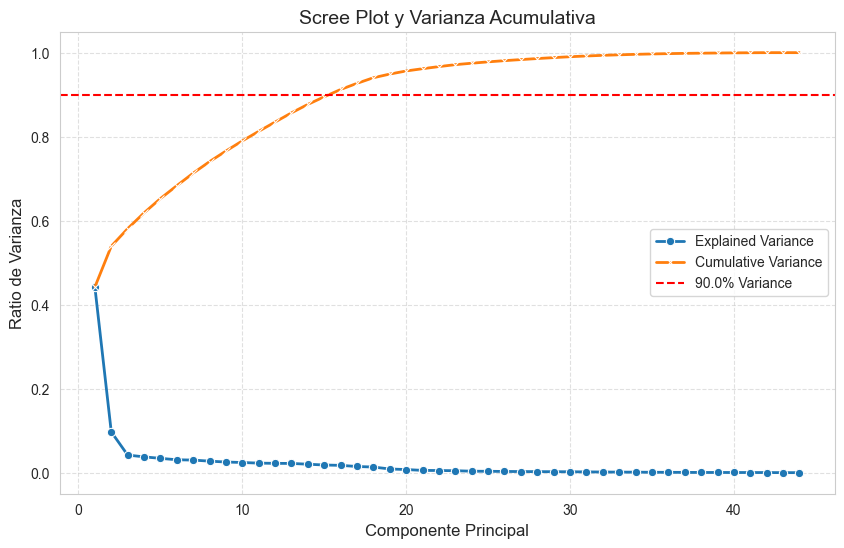

In [34]:
plt.figure(figsize=(10, 6))

sns.lineplot(x=range(1, len(explained_variance_ratio) + 1), 
             y=explained_variance_ratio, 
             marker='o', 
             label='Explained Variance', 
             linewidth=2)

sns.lineplot(x=range(1, len(explained_variance_ratio) + 1), 
             y=np.cumsum(explained_variance_ratio), 
             marker='x', 
             label='Cumulative Variance', 
             linewidth=2)

plt.axhline(y=variance_percentage, color='red', linestyle='--', label=f'{variance_percentage*100}% Variance')

plt.xlabel('Componente Principal', fontsize=12)
plt.ylabel('Ratio de Varianza', fontsize=12)
plt.title('Scree Plot y Varianza Acumulativa', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

En la siguiente grafica podemos observar que solo es necesario 16 componentes para el 90% de la varianza

In [35]:
pca = PCA(n_components=6)
pca_train_data = pca.fit_transform(x_train_data)
pca_train_data.shape

(571, 6)


Sabiendo el numero de componentes necesarios podemos ahora aplicar el PCA para nuestros valores actuales.

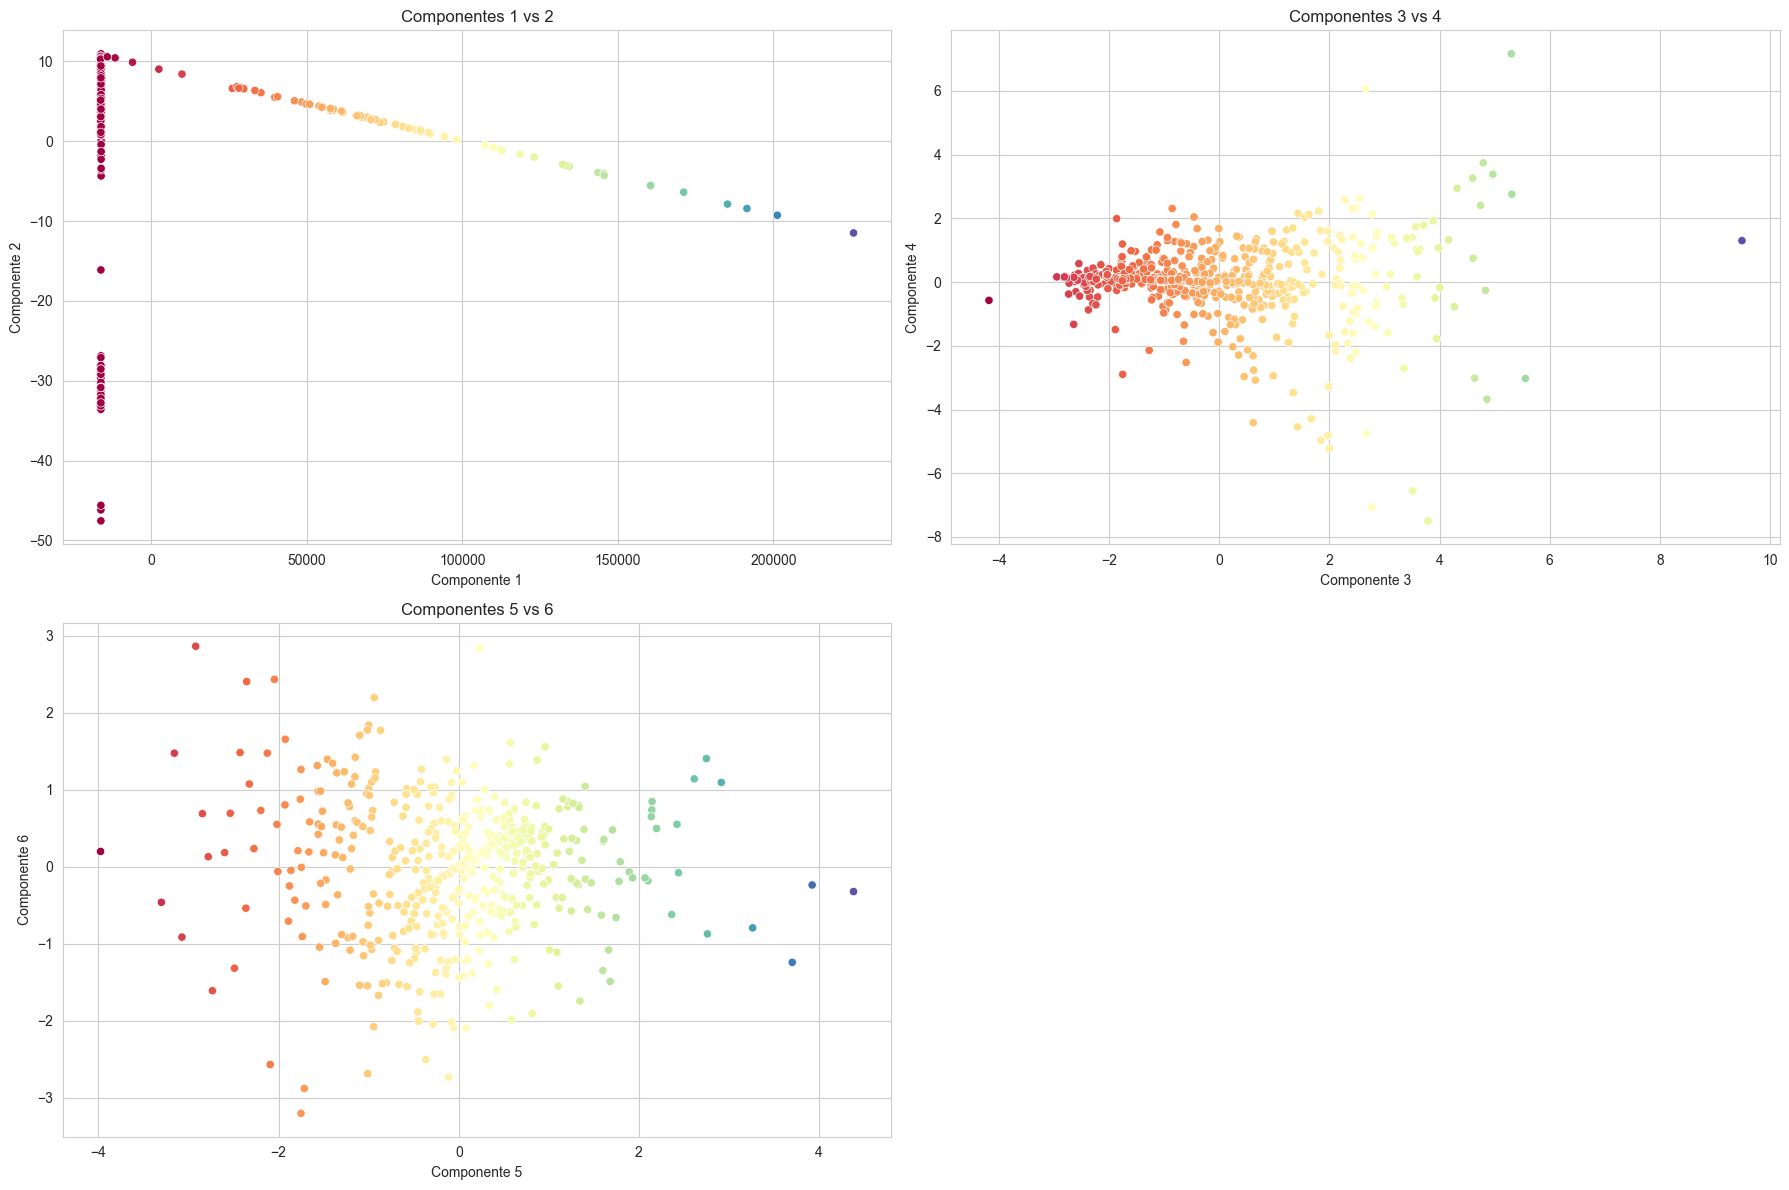

In [36]:
visualize_multiple_components(pca_train_data, num_components=20)

La gráfica representa los datos reducidos utilizando Principal Component Analysis (PCA).
La grafica superior izquierda muestra una dispersión significativa a lo largo del Componente 1, que probablemente captura la mayor parte de la variación. El Componente 2 tiene una variación mínima en comparación con el Componente 1, como se refleja en su distribución más compacta. Las gráficas como los Componentes 5 frente a 6 y los Componentes 7 frente a 8 muestran distribuciones más equilibradas, lo que sugiere que representan variaciones más pequeñas pero significativas en el conjunto de datos.

Los gráficos se vuelven progresivamente más ajustados y agrupados a medida que se pasa a componentes superiores (por ejemplo, componentes 13 a 16), lo que indica que estos componentes capturan muy poca varianza.


## Implementación del Pipeline

En esta sección, implementamos un pipeline donde encadenamos los pasos principales del preprocesamiento: transformada wavelet, reducción de dimensionalidad (LLE o PCA) y normalización. Esto nos permite automatizar el flujo de trabajo, garantizar consistencia en las transformaciones, y facilitar la aplicación de los mismos pasos a los conjuntos de entrenamiento, validación y prueba. El pipeline optimiza el proceso, reduciendo errores manuales y asegurando reproducibilidad.


In [37]:
class StandardScalerTSTransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit scaler transformer for time-series data.
    '''

    def fit(self, X, y=None):
        self.x_mean = X['x'].explode().mean()
        self.x_std = X['x'].explode().std()
        self.y_mean = X['y'].explode().mean()
        self.y_std = X['y'].explode().std()
        self.column_names = list(X.columns)

        return self

    def transform(self, X, y=None):
        normalized_x = (X['x'].to_list() - self.x_mean) / self.x_std
        normalized_y = (X['y'].to_list() - self.y_mean) / self.y_std

        new_x_column = list(pd.DataFrame(normalized_x).values)
        new_y_column = list(pd.DataFrame(normalized_y).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T
        transformed_columns.columns = self.column_names

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


std_scaler = StandardScalerTSTransformer()

col_transformer = ColumnTransformer([
    ('stdscaler', std_scaler, ['x','y'])
], remainder='passthrough')

df_norm = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_norm = pd.DataFrame(df_norm, columns=column_names) # transformer generates matrix, convert back to dataframe

In [38]:
class LLETransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer LLE transformation of time-series data.
    '''

    def fit(self, X, y=None):
        self.column_names = list(X.columns)
        return self

    def transform(self, X, y=None):
        self.x_train_data = pd.DataFrame(X['x'].to_list())
        self.y_train_data = pd.DataFrame(X['y'].to_list())
        
        x_embedding = LocallyLinearEmbedding(n_components=6, n_neighbors=4, eigen_solver='dense')
        y_embedding = LocallyLinearEmbedding(n_components=6, n_neighbors=4, eigen_solver='dense')

        x_lle_data = x_embedding.fit_transform(self.x_train_data)
        y_lle_data = y_embedding.fit_transform(self.y_train_data)


        new_x_column = list(pd.DataFrame(x_lle_data).values)
        new_y_column = list(pd.DataFrame(x_lle_data).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


lle_transformer = LLETransformer()

col_transformer = ColumnTransformer([
    ('lle', lle_transformer, ['x','y'])
], remainder='passthrough')

df_lle = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_lle = pd.DataFrame(df_lle, columns=column_names) # transformer generates matrix, convert back to dataframe

In [39]:
class PCATransformer(BaseEstimator, TransformerMixin):
    '''
    Custom scikit transformer PCA transformation of time-series data.
    '''

    def fit(self, X, y=None):
        self.column_names = list(X.columns)
        return self

    def transform(self, X, y=None):
        self.x_train_data = pd.DataFrame(X['x'].to_list())
        self.y_train_data = pd.DataFrame(X['y'].to_list())

        x_pca = PCA(n_components=6)
        y_pca = PCA(n_components=6)

        x_pca_data = x_pca.fit_transform(self.x_train_data)
        y_pca_data = y_pca.fit_transform(self.y_train_data)


        new_x_column = list(pd.DataFrame(x_pca_data).values)
        new_y_column = list(pd.DataFrame(y_pca_data).values)
        transformed_columns = pd.DataFrame([new_x_column, new_y_column]).T

        return transformed_columns

    def get_feature_names_out(self, column_names):
        return self.column_names


pca_transformer = PCATransformer()

col_transformer = ColumnTransformer([
    ('lle', pca_transformer, ['x','y'])
], remainder='passthrough')

df_pca = col_transformer.fit_transform(wavelet_train_df)
column_names = [x.split('__')[-1] for x in col_transformer.get_feature_names_out()] # get column names back again
X_train_pca = pd.DataFrame(df_pca, columns=column_names) # transformer generates matrix, convert back to dataframe

In [40]:
def create_preprocessing_pipeline(reduction_method='lle'):
    columnas_numericas = ['x', 'y']
    preprocessing_pipeline = None
    if reduction_method == 'lle':
        preprocessing_pipeline = Pipeline([
            ('wavelet', WaveletTransformer()),
            ('lle', LLETransformer())
        ])
    elif reduction_method == 'pca':
        preprocessing_pipeline = Pipeline([
            ('wavelet', WaveletTransformer()),
            ('norm', StandardScalerTSTransformer()),
            ('pca', PCATransformer())
        ])

    preprocesador = ColumnTransformer(
        transformers=[
            ('numericas', preprocessing_pipeline, columnas_numericas)
        ],
        remainder='passthrough'
    )
    return preprocesador

In [41]:
# Crear y ajustar pipeline
pipeline = create_preprocessing_pipeline(reduction_method='lle')
X_train_preprocessed = pipeline.fit_transform(df_augmented)
X_val_preprocessed = pipeline.transform(X_val)
X_test_preprocessed = pipeline.transform(X_test)

# Convertir a DataFrame para mejor manejo
columns = [f'caracteristica_{i}' for i in range(X_train_preprocessed.shape[1])]
X_train_transformed = pd.DataFrame(X_train_preprocessed, columns=columns)
X_val_transformed = pd.DataFrame(X_val_preprocessed, columns=columns)
X_test_transformed = pd.DataFrame(X_test_preprocessed, columns=columns)

# Mostrar dimensiones y primeras filas
print("Dimensiones después de la transformación:")
print(f"Train: {X_train_transformed.shape}")
print(f"Validación: {X_val_transformed.shape}")
print(f"Test: {X_test_transformed.shape}")

Dimensiones después de la transformación:
Train: (571, 4)
Validación: (556, 4)
Test: (556, 4)


### Visualización de los datos transformados

En esta sección, utilizamos una función para descomponer y visualizar las señales mediante la transformada wavelet. La visualización incluye la señal original, sus coeficientes de aproximación (baja frecuencia) y los coeficientes de detalle (alta frecuencia) en diferentes niveles de descomposición. Esto nos permite analizar cómo la transformada wavelet separa las características globales y locales de la señal, proporcionando una representación detallada para entender mejor los datos procesados.


In [42]:
def visualizar_wavelet(señal_original, nivel=3, wavelet='db4'):
    """
    Visualiza la descomposición wavelet de una señal.
    Incluye señal original, coeficientes de aproximación y detalles en diferentes niveles.
    """
    # Realizar la descomposición wavelet
    coefs = pywt.wavedec(señal_original, wavelet, level=nivel)
    
    # Crear la figura
    fig, axes = plt.subplots(nivel + 2, 1, figsize=(15, 3 * (nivel + 2)))

    # Personalizar estilos con Seaborn
    sns.set_theme(style="whitegrid")

    # Plotear señal original
    sns.lineplot(x=range(len(señal_original)), y=señal_original, ax=axes[0], linewidth=2, color='blue')
    axes[0].set_title('Señal Original', fontsize=12)
    axes[0].set_xlabel('Índice', fontsize=10)
    axes[0].set_ylabel('Amplitud', fontsize=10)

    # Plotear coeficientes de aproximación
    sns.lineplot(x=range(len(coefs[0])), y=coefs[0], ax=axes[1], linewidth=2, color='green')
    axes[1].set_title('Coeficientes de Aproximación', fontsize=12)
    axes[1].set_xlabel('Índice', fontsize=10)
    axes[1].set_ylabel('Amplitud', fontsize=10)

    # Plotear coeficientes de detalle
    for i, coef in enumerate(coefs[1:], 2):
        sns.lineplot(x=range(len(coef)), y=coef, ax=axes[i], linewidth=2, color='orange')
        axes[i].set_title(f'Coeficientes de Detalle Nivel {i-1}', fontsize=12)
        axes[i].set_xlabel('Índice', fontsize=10)
        axes[i].set_ylabel('Amplitud', fontsize=10)

    # Ajustar el diseño
    plt.tight_layout()
    return fig


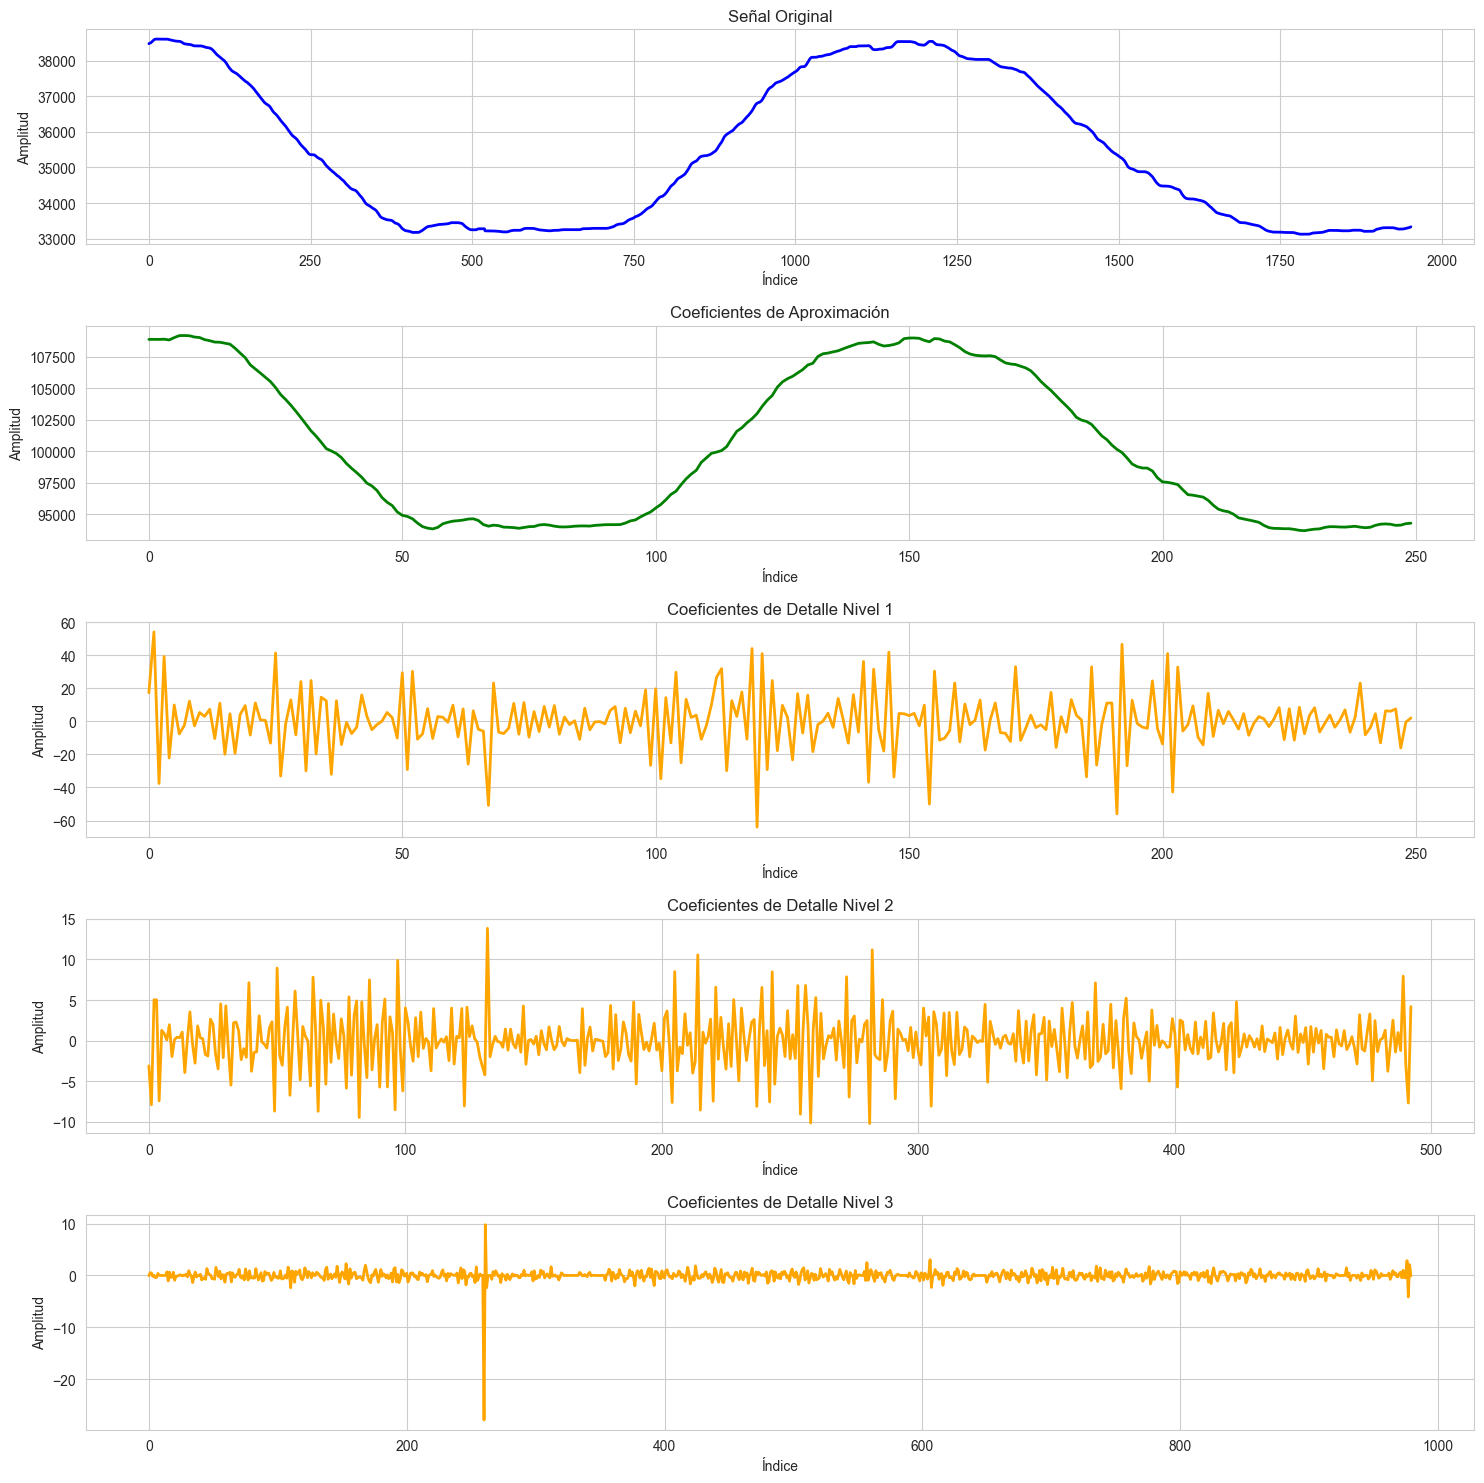

In [43]:
# Ejecutar visualizaciones
try:
    # Ejemplo de descomposición wavelet para una señal
    señal_ejemplo = X_train['x'].iloc[0]  # Primera señal x
    fig1 = visualizar_wavelet(señal_ejemplo)
    plt.show()
    
except Exception as e:
    print(f"Error en la visualización: {str(e)}")

La gráfica presenta el resultado de la **Transformada Wavelet Discreta (DWT)** aplicada a una señal, descomponiéndola en diferentes componentes para analizar su estructura en el dominio de la frecuencia y el tiempo.

1. **Señal Original (arriba):**
   - Representa la señal completa sin transformaciones, mostrando la tendencia general y los detalles presentes en la señal en el dominio temporal.

2. **Coeficientes de Aproximación (segunda gráfica):**
   - Capturan las componentes de **baja frecuencia**, que representan la tendencia global de la señal.
   - Este componente conserva la mayor parte de la energía de la señal y describe su forma general.

3. **Coeficientes de Detalle (gráficas siguientes):**
   - Capturan las componentes de **alta frecuencia** en diferentes niveles de descomposición:
     - **Nivel 1:** Resalta los cambios más significativos en la señal a alta frecuencia.
     - **Nivel 2:** Muestra detalles más finos en una escala intermedia.
     - **Nivel 3:** Resalta las fluctuaciones más pequeñas en la señal, mostrando un análisis más detallado.

## Conclusiones

En este notebook, se ha llevado a cabo la **fase de preparación de datos** siguiendo los principios de la metodología **CRISP-ML**, con el objetivo de transformar los datos crudos en un conjunto adecuado para modelado. Este proceso incluyó varias etapas clave, cada una diseñada para maximizar la calidad y utilidad de los datos en los modelos de aprendizaje automático.

**Principales resultados y aportaciones:**

1. **Normalización:**
   - Aseguramos que las características estuvieran en la misma escala mediante normalización estándar, mejorando la convergencia de los modelos y evitando sesgos derivados de magnitudes desiguales en los datos.

2. **Aumento de Datos (Data Augmentation):**
   - Incrementamos el conjunto de datos en un 20% mediante la introducción de ruido gaussiano controlado. Esto mejoró la capacidad generalizadora del modelo, reduciendo el riesgo de sobreajuste al entrenar con datos más diversos.

3. **Transformada Wavelet:**
   - Extraímos características representativas tanto en el dominio de frecuencia como en el dominio temporal, permitiendo capturar patrones relevantes en las señales originales.

4. **Reducción de Dimensionalidad (LLE y PCA):**
   - Implementamos técnicas de reducción de dimensionalidad para preservar la información más relevante en los datos, manteniendo relaciones locales (LLE) y optimizando el uso de componentes principales (PCA). Esto permitió reducir la complejidad computacional sin pérdida significativa de información.

5. **Pipeline de Preprocesamiento:**
   - Construimos un pipeline robusto que automatiza el flujo de trabajo de preprocesamiento, garantizando consistencia y reproducibilidad. Este enfoque facilita la aplicación uniforme de las transformaciones a los datos de entrenamiento, validación y prueba.

**Conclusión general:**
La fase de preparación de datos realizada en este proyecto demuestra la importancia de un preprocesamiento estructurado y reproducible para obtener datos de alta calidad. En el contexto de la metodología **CRISP-ML**, este proceso cumple el objetivo de convertir datos crudos en una base sólida para el modelado, asegurando que los modelos sean eficientes, generalizables y capaces de manejar variaciones en los datos.

El enfoque implementado, que combina normalización, extracción de características, aumento de datos y reducción de dimensionalidad, sienta las bases para un modelo de aprendizaje automático robusto, alineado con las mejores prácticas de MLOps y ciclos de vida de Machine Learning.


## Referencias

Galli, S. (2022). Python Feature Engineering Cookbook. Packt Publishing. https://learning.oreilly.com/library/view/python-feature-engineering/9781804611302/B18894_03.xhtmlLinks to an external site.

Visengeriyeva, L., Kammer, A., Bär, I., Kniesz, A., y Plöd, M. (2023). CRISP-ML(Q). The ML Lifecycle Process. MLOps. INNOQ. https://ml-ops.org/content/crisp-mlLinks to an external site.